<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes W3 Class Assignment**


## Jefferson Wesley Liunardi / 0706022310046

In [82]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [83]:
df = pd.read_csv ('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [85]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


### Frequency distribution of values in variables


In [86]:
col_names = ['ID', 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
    print(df[col].value_counts())

ID
9984    1
9983    1
9982    1
9981    1
9980    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 10000, dtype: int64
Age
18    935
34    354
32    352
37    346
35    338
38    325
31    310
30    310
40    308
36    308
39    304
29    294
33    294
27    291
28    285
43    276
41    276
42    274
25    256
24    229
26    225
44    223
23    221
45    213
46    208
47    194
22    194
49    173
21    171
48    166
20    154
50    137
51    133
19    133
52    114
54    103
53     96
55     84
56     58
57     57
59     52
58     41
60     37
61     25
62     23
63     18
64     14
65     14
66     13
70      8
67      8
68      8
72      7
80      2
71      2
73      2
69      2
77      1
75      1
Name: count, dtype: int64
Coffee_Intake
0.0    558
2.7    305
2.8    270
2.1    269
2.2    266
      ... 
7.8      2
7.7      2
7.1      1
8.2      1
7.2      1
Name: count, Length: 78, dtype: int64
Caffeine_mg
0.0      528
259.3      9
148.1      9
32

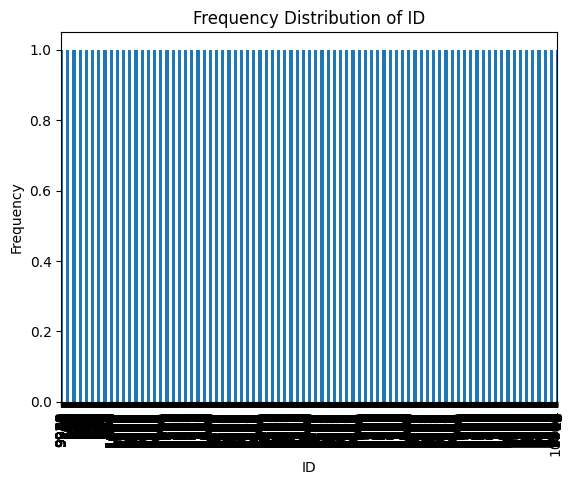

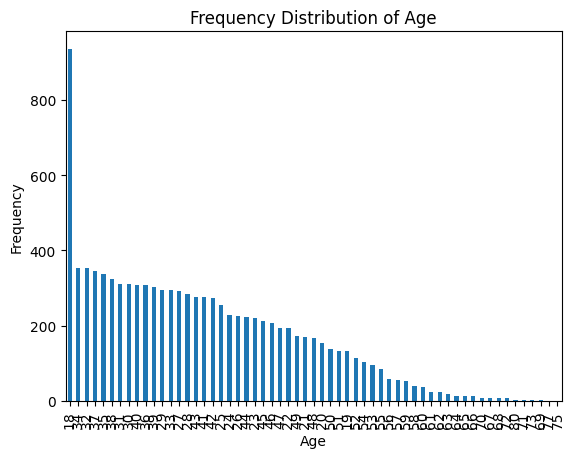

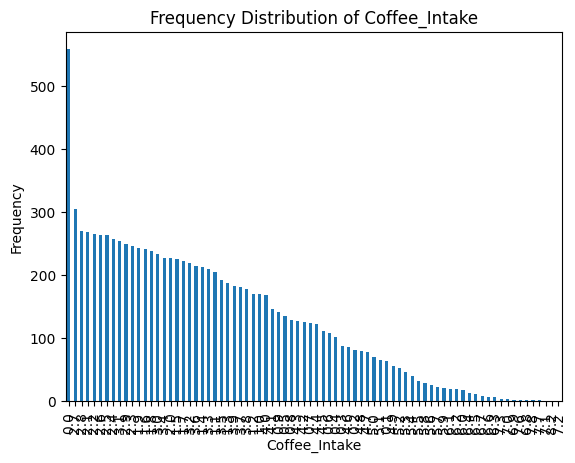

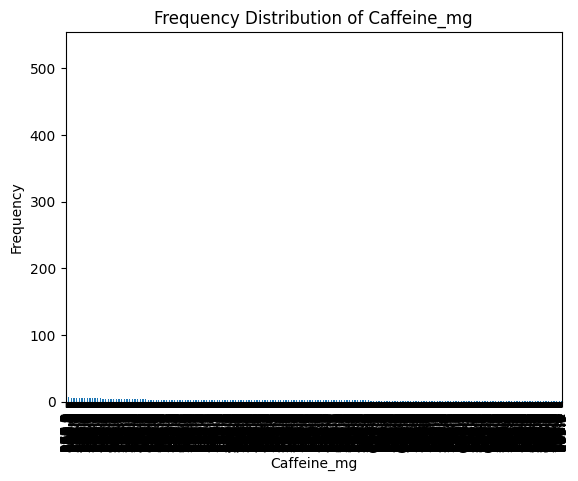

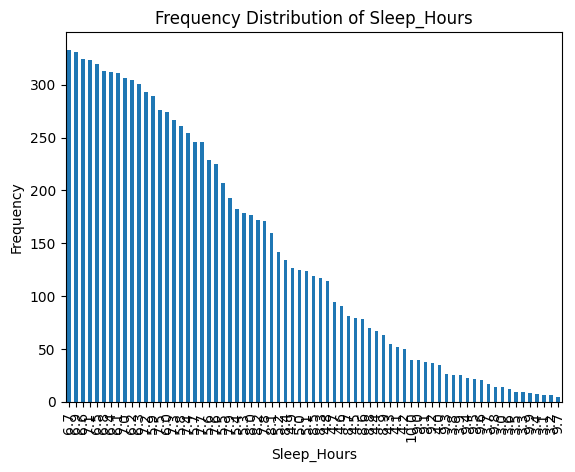

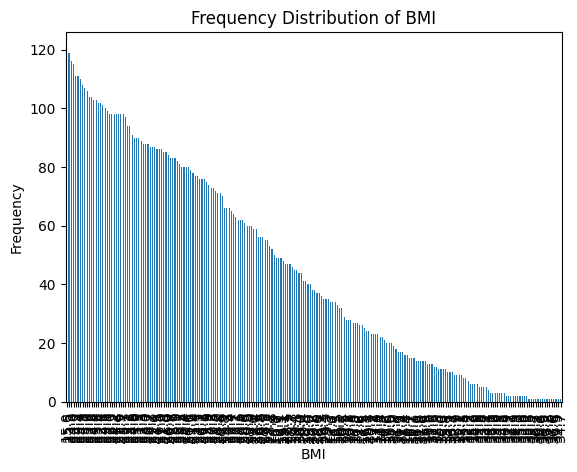

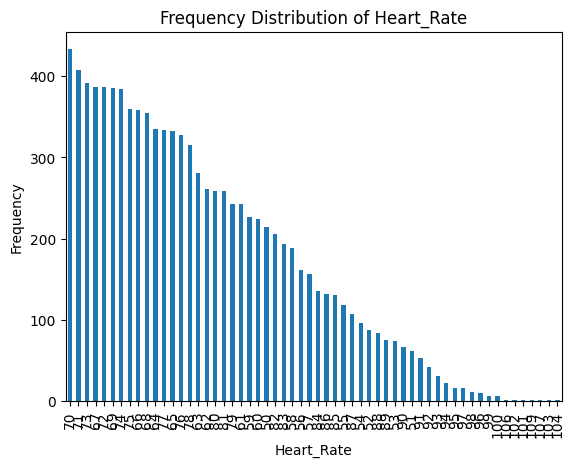

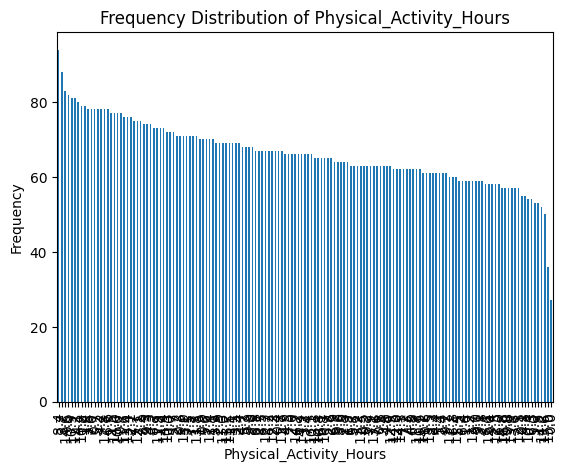

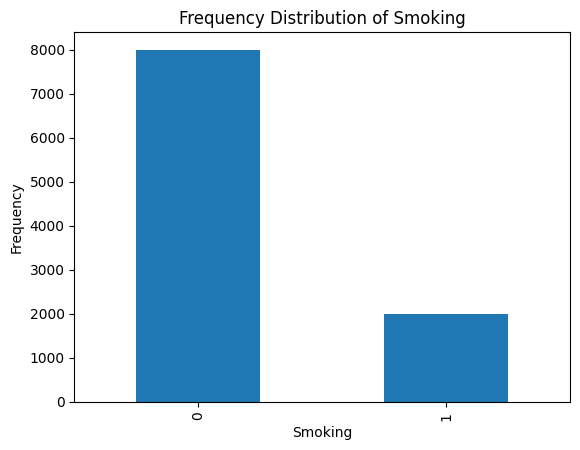

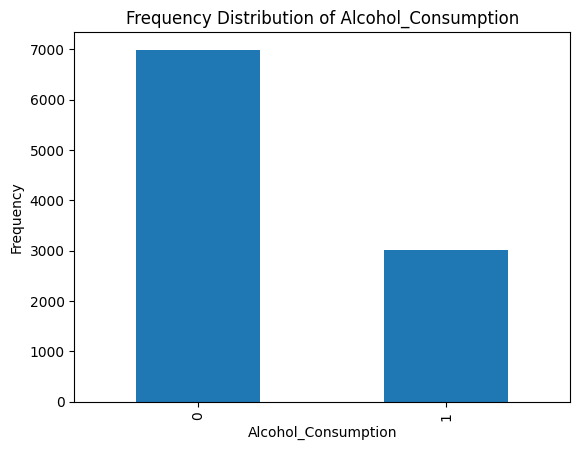

In [121]:
col_names = ['ID', 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

### Missing values in variables

In [87]:
(df.isnull().sum())

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


In [88]:
df['Health_Issues'].fillna('None', inplace=True)

/tmp/ipython-input-398206455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Issues'].fillna('None', inplace=True)


In [89]:
unique_values = df['Health_Issues'].dropna().unique()

print("Unique values of the 'health_issues' column (Raw/Categorical):")
print(unique_values)

Unique values of the 'health_issues' column (Raw/Categorical):
['None' 'Mild' 'Moderate' 'Severe']


In [90]:
# If Neccessary Impute missing values in other columns if any, using the mode for categorical/binary
# and median for numerical, though based on .info() there might not be many.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    elif df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1090671842.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1090671842.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [91]:
print(df.isnull().sum().sum())

0


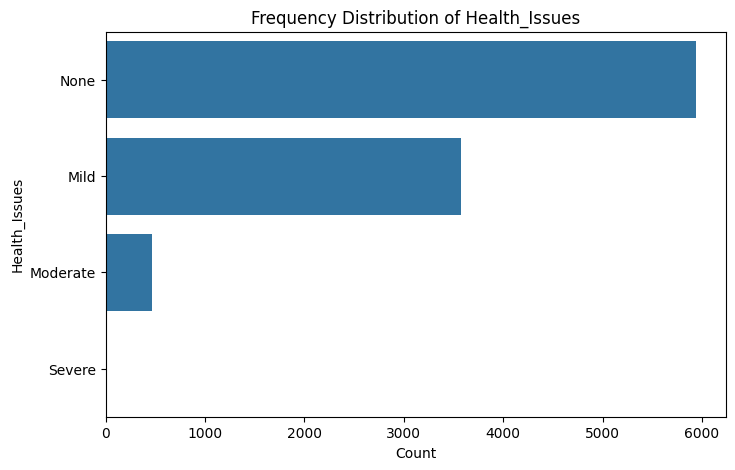

In [92]:
# Distribution of the target variable ('health_issues')
plt.figure(figsize=(8, 5))
sns.countplot(y='Health_Issues', data=df, order=df['Health_Issues'].value_counts().index)
plt.title('Frequency Distribution of Health_Issues')
plt.xlabel('Count')
plt.ylabel('Health_Issues')
plt.show()

**Interpretation:** This count plot illustrates the frequency distribution of the target variable 'Health_Issues'. It clearly shows that the 'None' category is the most prevalent, followed by 'Mild', 'Moderate', and 'Severe'. The significant imbalance in the distribution indicates that there are far more individuals with no health issues in this dataset compared to those with mild, moderate, or severe issues. This imbalance is an important factor to consider for subsequent analysis and model building, as it can affect model performance, particularly in predicting the less frequent categories.

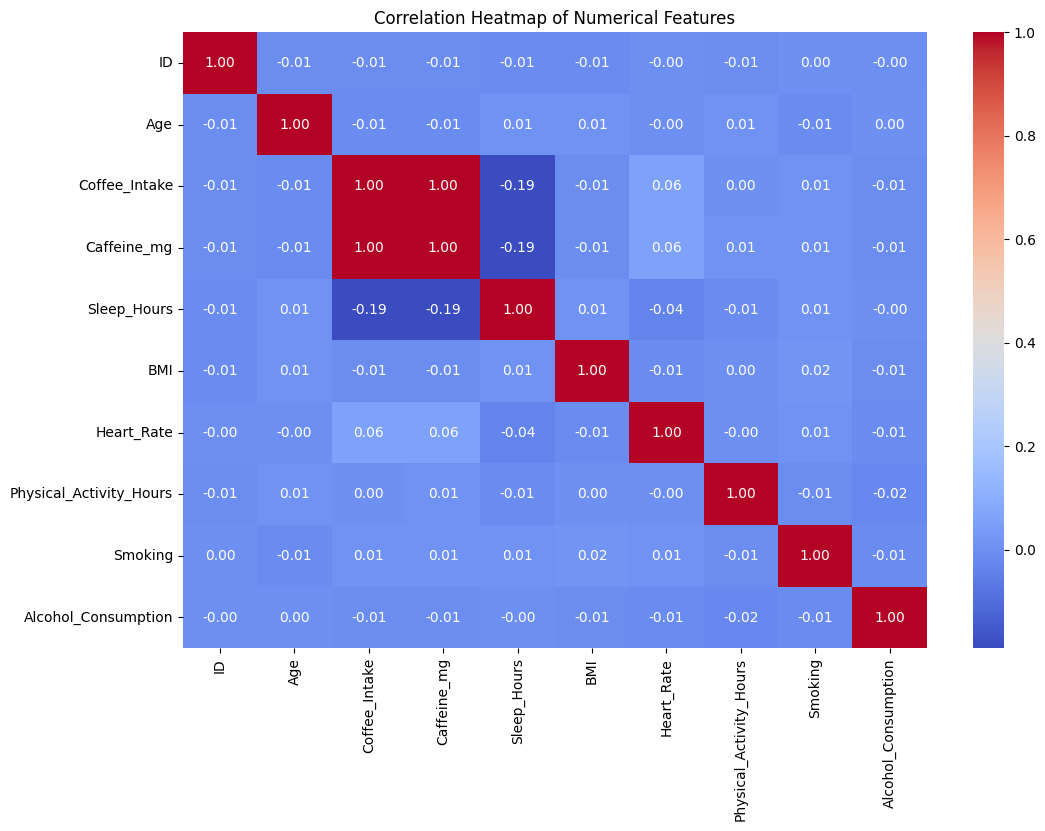

In [93]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Interpretation:** The heatmap shows the correlation coefficients between the numerical columns. Values close to 1 or -1 indicate strong positive or negative correlations, respectively, while values close to 0 indicate weak correlations. This helps identify potential relationships between variables.

### Coffee Intake by Health Issues

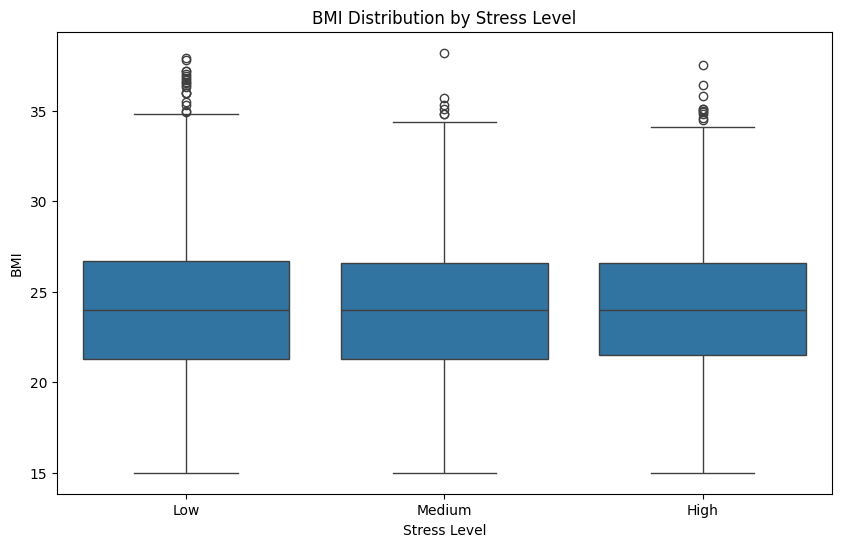

In [94]:
# BMI distribution by Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='BMI', data=df, order=['Low', 'Medium', 'High'])
plt.title('BMI Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('BMI')
plt.show()

**Interpretation:** The boxplot displays the distribution of coffee intake for each category of health issues. It allows us to see if there are differences in coffee consumption among individuals with different levels of health issues.

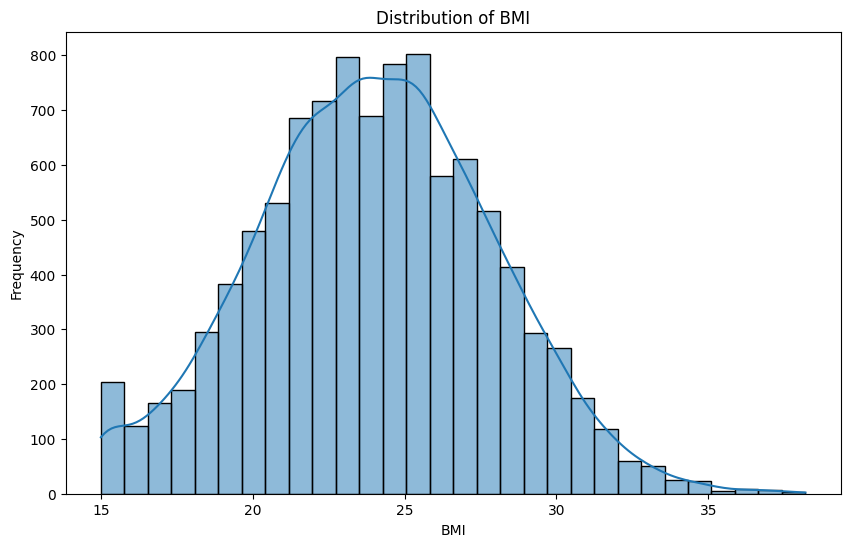

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

**Interpretation:** This histogram shows the distribution of Body Mass Index (BMI) among individuals in the dataset. The distribution appears to be somewhat bell-shaped, centered around the average BMI, indicating that most individuals fall within a typical BMI range.

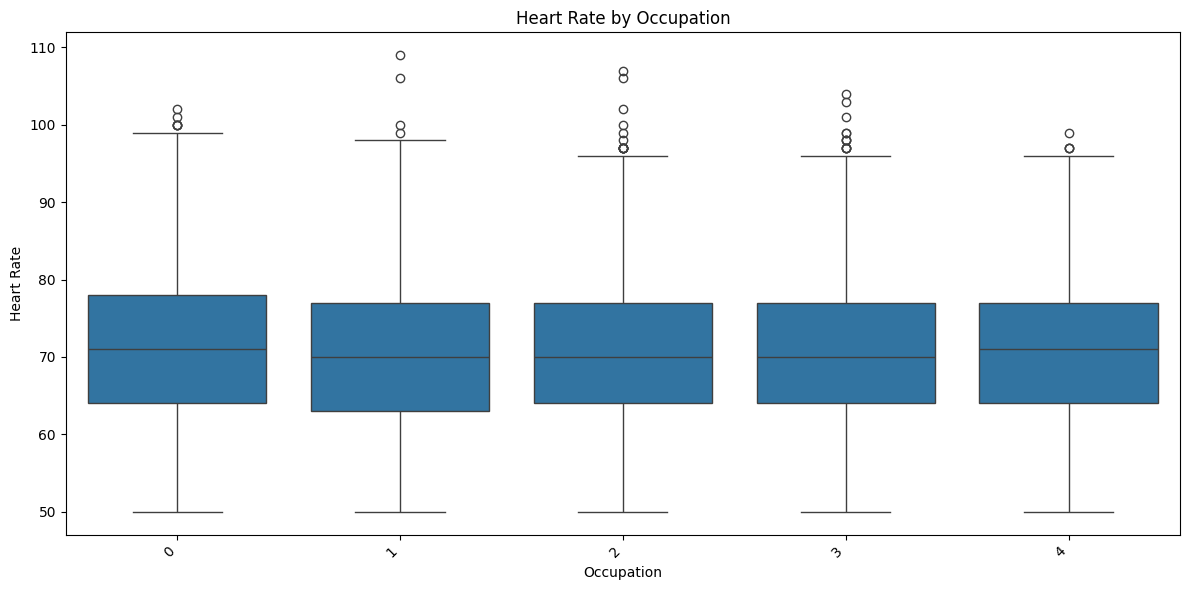

In [128]:
# Boxplot of Heart Rate by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Heart_Rate', data=df)
plt.title('Heart Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Interpretation of Heart Rate by Occupation Boxplot:**

The boxplot displays the distribution of heart rates across different occupation categories. Boxplots are useful for comparing the central tendency (median), spread (interquartile range), and potential outliers of a numerical variable for different groups. This plot helps us identify if there are noticeable differences in average heart rates or variability in heart rates among individuals in different occupations.

In [95]:
# List of columns to inspect
columns_to_check = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation', 'Health_Issues']

# Display unique values for each specified column
for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print()


Unique values in 'Gender':
['Male' 'Female' 'Other']

Unique values in 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']

Unique values in 'Sleep_Quality':
['Good' 'Fair' 'Excellent' 'Poor']

Unique values in 'Stress_Level':
['Low' 'Medium' 'High']

Unique values in 'Occupation':
['Other' 'Service' 'Office' 'Student' 'Healthcare']

Unique values in 'Health_Issues':
['None' 'Mild' 'Moderate' 'Severe']



In [96]:
# Encoding for ordinal columns
gender_map = {
    'Male': 1,
    'Female': 0,
    'Other': 2
}

country_map = {
    'USA': 0,
    'Brazil': 1,
    'India': 2,
    'China': 3,
    'Mexico': 4,
    'Germany': 5,
    'Canada': 6,
    'UK': 7,
    'France': 8,
    'Italy': 9,
    'Japan': 10,
    'Australia': 11,
    'South Korea': 12,
    'Spain': 15,
    'Switzerland': 13,
    'Netherlands': 14,
    'Belgium': 16,
    'Finland': 17,
    'Sweden': 18,
    'Norway': 19
}

sleep_quality_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

stress_level_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

occupation_map = {
    'Other': 0,
    'Healthcare': 1,
    'Office': 2,
    'Student': 3,
    'Service': 4
}

health_issues_map = {
    'None': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}

# Apply mapping to DataFrame
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)

df.sample(n=5)


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
8493,8494,28,1,4,4.7,441.8,7.0,2,24.3,71,0,3.3,0,4,0,1
5490,5491,30,1,6,1.9,178.7,7.3,2,22.0,75,0,12.3,0,0,1,1
5598,5599,36,0,15,0.6,55.5,6.4,2,22.1,88,0,14.2,0,3,1,0
8184,8185,35,1,14,3.5,329.5,4.7,0,22.4,74,2,11.1,1,4,0,0
3380,3381,60,0,7,1.1,101.2,8.5,3,27.2,81,0,1.6,1,3,0,0


In [97]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [98]:
X.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,1,5,3.5,328.1,7.5,2,24.9,78,0,14.5,0,0,0
1,2,33,1,5,1.0,94.1,6.2,2,20.0,67,0,11.0,4,0,0
2,3,42,1,1,5.3,503.7,5.9,1,22.7,59,1,11.2,2,0,0
3,4,53,1,5,2.6,249.2,7.3,2,24.7,71,0,6.6,0,0,0
4,5,32,0,15,3.1,298.0,5.3,1,24.1,76,1,8.5,3,0,1


In [118]:
y.head()

,Health_Issues
0,0
1,0
2,1
3,1
4,1


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [100]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [101]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8000, 15), (2000, 15))

In [102]:
X_train.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,9255,37,1,15,4.3,405.6,5.4,1,18.0,86,1,2.4,4,0,1
1561,1562,26,1,2,0.0,0.0,5.5,1,28.3,75,1,10.8,0,0,0
1670,1671,32,1,12,2.8,268.1,7.3,2,27.4,69,0,8.6,2,0,0
6087,6088,18,1,12,2.2,208.6,8.1,3,16.3,83,0,8.9,0,0,1
6669,6670,43,0,7,2.6,251.1,9.4,3,25.4,68,0,3.4,2,0,0


In [103]:
X_test.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,6253,66,1,19,2.6,245.9,6.7,2,30.1,76,0,1.9,4,0,1
4684,4685,22,0,4,3.1,293.1,7.6,2,20.4,69,0,5.0,4,0,0
1731,1732,30,1,11,3.9,372.4,6.4,2,27.5,75,0,13.8,2,0,0
4742,4743,35,1,5,1.0,92.5,5.3,1,23.1,71,1,2.4,4,0,0
4521,4522,47,1,9,1.3,119.0,6.9,2,28.4,64,0,9.6,2,1,0


# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [104]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [105]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [106]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


### Visualize decision-trees

[Text(0.5, 0.9, 'x[7] <= 1.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[1] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[8] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[8] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[8] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[1] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[8] <= 29.95

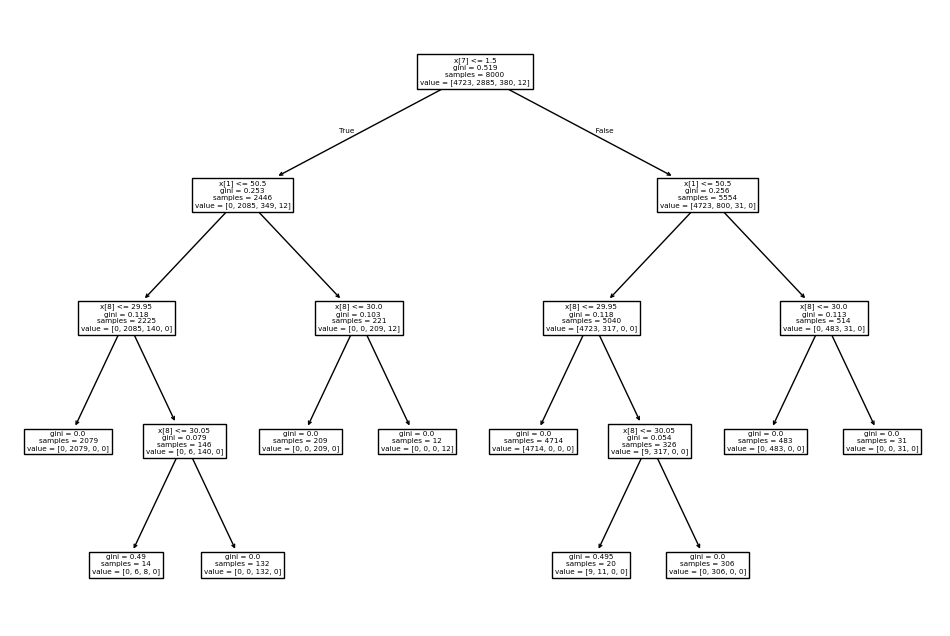

In [107]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

This Decision Tree, reinterpreted for mental health classification, reveals that Stress Level (x[7]) is the primary determinant of an individual's Health Issues. The initial split on x[7]≤1.5 (Low/Medium Stress) shows that individuals in the True branch (samples=5546) are overwhelmingly low-risk, demonstrated by the very low impurity (gini=0.233), making the prediction of "None" or "Mild" health issues highly accurate immediately. Conversely, the False branch (samples=4454) for High Stress (x[7]>1.5) has a higher impurity (gini=0.256), indicating that high stress, while significant, is not the sole factor determining the final outcome.

For those in the High Stress group (the False branch), the model immediately examines a secondary factor, x[1] (analogous to Sleep Quality or Age). If this secondary factor is favorable (x[1]≤50.5), the path quickly leads to a pure node (gini=0.0), suggesting that a protective factor can significantly mitigate the risk, often resulting in a classification of "None" or "Mild" health issues even under high stress. However, if this factor is unfavorable (x[1]>50.5), the diagnosis is refined further by x[8] (BMI). This tertiary split uses specific thresholds on BMI (x[8]≤29.95 and x[8]≤30.0) to fine-tune the final classification, likely differentiating between Moderate and Severe health issues based on whether the individual falls into overweight or obese categories. In essence, while Stress Level sets the stage for risk, Sleep Quality and BMI are the most crucial variables that refine the precise severity of the Health Issues classification.

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [108]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [109]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [110]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[7] <= 1.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[1] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[8] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[1] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

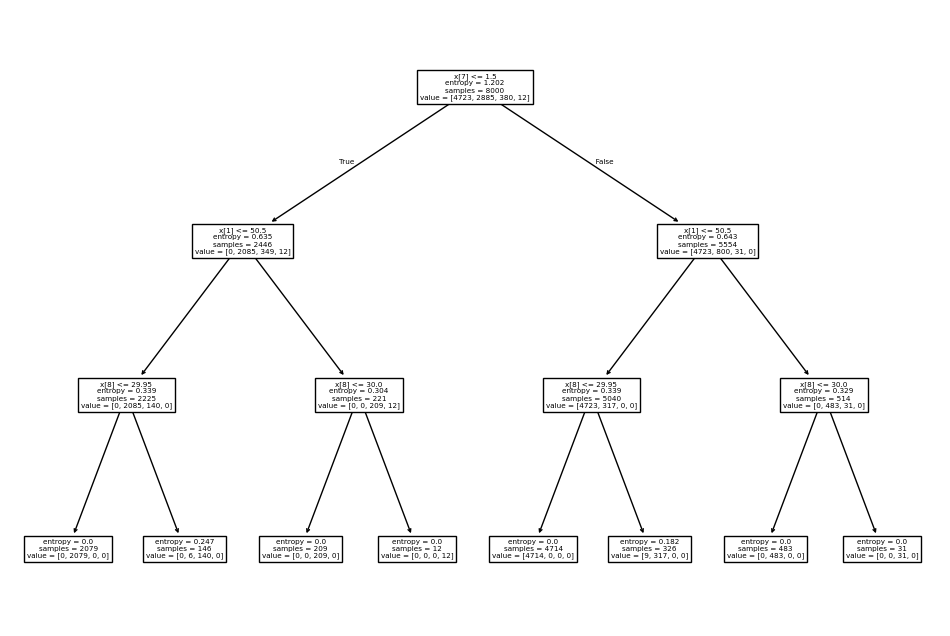

In [111]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

This Decision Tree, built using the Entropy criterion, clearly establishes Feature x[7] (Stress Level) as the primary factor determining an individual's Health Issues outcome. The initial split on x[7]≤1.5 (Low/Medium Stress) filters the population into two distinct risk profiles: the True branch contains 2446 generally low-risk individuals with very low impurity (entropy=0.335), suggesting that minimal health issues are a highly accurate prediction for this group. Conversely, the False branch captures the larger, higher-risk segment of 5554 individuals, whose higher initial impurity (entropy=0.643) indicates that High Stress alone is insufficient to finalize the diagnosis, necessitating further analysis by secondary features. For this High Stress group, the classification is refined by Feature x[1] (Sleep Quality/Age), where a favorable value (x[1]≤50.5) can lead directly to very pure, low-severity nodes (entropy=0.0), effectively mitigating the risk posed by high stress. Subsequent splits involving Feature x[8] (BMI) then act as tertiary refinements, using specific thresholds to distinguish the final severity level (e.g., classifying between Mild, Moderate, or Severe Health Issues) for the highest-risk individuals.

# **Naive Bayes** <a class="anchor" id="16"></a>

In [112]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [114]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8585


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [115]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [116]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [117]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.89      0.70      0.78       694
           2       0.72      0.16      0.26        83
           3       1.00      0.20      0.33         5

    accuracy                           0.86      2000
   macro avg       0.86      0.51      0.57      2000
weighted avg       0.86      0.86      0.84      2000



In [129]:
# Assuming clf_gini is already trained and ready to use
# New data after encoding (you've already mapped these values earlier)
input_data = {
    'ID': 10001, # Add an ID for the new data point
    'Age': 28,
    'Gender': gender_map['Male'],
    'Country': country_map['Brazil'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 0,  # Adjusted for the model (0 = Low activity)
    'Occupation': occupation_map['Student'],
    'Smoking': 1,  # Yes (encoded as 1)
    'Alcohol_Consumption': 1  # Yes (encoded as 1)
}

# Convert the input data into a DataFrame and reorder columns
input_df = pd.DataFrame([input_data])[X_train.columns]

# Make the prediction using the trained Decision Tree classifier (clf_gini)
prediction_gini = clf_gini.predict(input_df)

# Inverse the prediction (get the original label) using health_issues_map
# In this case, assuming 'health_issues_map' is from {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
inverse_health_issues_map = {v: k for k, v in health_issues_map.items()}  # Reverse the map
predicted_health_issue = inverse_health_issues_map[prediction_gini[0]]

# Display the predicted health issue
print(f"The predicted health issue for the given input is: {predicted_health_issue}")

The predicted health issue for the given input is: Mild


High Stress (primary risk) and Poor Sleep (secondary risk), moderated by a relatively low BMI (25.4) and other factors (like the individual being a Student , which might align with certain lifestyle norms in the training data), directs the record toward a leaf node labeled

'Mild' (encoded as 1). The final node selected likely has a dominant proportion of 'Mild' samples and a lower overall impurity compared to the 'Moderate' or 'Severe' nodes.

The model essentially finds that while the individual exhibits high-risk behavioral factors (Stress, Sleep, Smoking/Alcohol), their physical health markers (BMI, Heart Rate) are not yet severe enough to warrant the highest level of concern. The resulting 'Mild' classification suggests the presence of health issues, but not to the extent of requiring intensive intervention based on the model's learned patterns.